In [1]:
import pandas
from datetime import datetime
import matplotlib.pyplot as plt
import numpy

In [2]:
with open('flask_critical_and_error_and_warning_and_info_and_debug.log','r') as fil:
    file_cont = fil.read().split('\n')

In [3]:
list_of_dicts = []
for line in file_cont:
    if ('[trace start' in line) or ('[trace end' in line):
        line_as_list = line.split('|')
        my_dict = {}
        my_dict['time'] = datetime.strptime(line_as_list[0].strip(), '%m/%d/%Y %H:%M:%S %p') # https://strftime.org/
        my_dict['file'] = line_as_list[1].strip()
        my_dict['line'] = line_as_list[3].strip()
        my_dict['function'] = line_as_list[4].strip()
        my_dict['start or stop'] = line_as_list[5].split(' ')[1]
        my_dict['indx'] = line_as_list[5].split(' ')[2].replace(']','')
        list_of_dicts.append(my_dict)

In [4]:
df_start_stop = pandas.DataFrame(list_of_dicts)

In [5]:
df_start_stop.head()

,file,function,indx,line,start or stop,time
0,controller.py,index,4605277,1229,start,2020-05-15 12:48:58
1,compute.py,create_d3js_json,5656887,2471,start,2020-05-15 12:48:58
2,common_lib.py,read_db,9612109,64,start,2020-05-15 12:48:58
3,common_lib.py,create_sql_connection,1045068,42,start,2020-05-15 12:48:58
4,common_lib.py,create_sql_connection,1045068,46,end,2020-05-15 12:48:58


In [6]:
df_start_stop[df_start_stop['indx']=='4605277']['file'].values[0]

'controller.py'

In [7]:
df_start_stop[df_start_stop['indx']=='4605277']['time'].values[0]

numpy.datetime64('2020-05-15T12:48:58.000000000')

In [8]:
list_of_dicts = []
for indx_val in df_start_stop['indx'].unique():
    if df_start_stop[df_start_stop['indx']==indx_val].shape[0] == 2:
        my_dict = {}
        my_dict['elapsed'] = abs((df_start_stop[df_start_stop['indx']==indx_val]['time'].values[0] - 
                       df_start_stop[df_start_stop['indx']==indx_val]['time'].values[1])/ numpy.timedelta64(1, 's'))
        if my_dict['elapsed'] > 0:
            my_dict['file'] = df_start_stop[df_start_stop['indx']==indx_val]['file'].values[0]
            my_dict['function'] = df_start_stop[df_start_stop['indx']==indx_val]['function'].values[0]
            my_dict['line'] = df_start_stop[df_start_stop['indx']==indx_val]['line'].values[0]
            # https://stackoverflow.com/questions/11865458/how-to-get-unix-timestamp-from-numpy-datetime64
            my_dict['start'] = (df_start_stop[df_start_stop['indx']==indx_val]['time'].values[0].astype('uint64') / 1e9).astype('uint32')
            list_of_dicts.append(my_dict)
    else:
        print(indx_val + ' is missing pair')

In [9]:
df = pandas.DataFrame(list_of_dicts)

In [10]:
df.head()

,elapsed,file,function,line,start
0,2.0,controller.py,index,1229,1589546938
1,2.0,compute.py,create_d3js_json,2471,1589546938
2,1.0,compute.py,create_png_from_latex,2835,1589546938
3,1.0,compute.py,create_png_from_latex,2835,1589546939
4,2.0,controller.py,navigation,1419,1589546949


In [11]:
df

,elapsed,file,function,line,start
0,2.0,controller.py,index,1229,1589546938
1,2.0,compute.py,create_d3js_json,2471,1589546938
2,1.0,compute.py,create_png_from_latex,2835,1589546938
3,1.0,compute.py,create_png_from_latex,2835,1589546939
4,2.0,controller.py,navigation,1419,1589546949
5,2.0,compute.py,create_files_of_db_content,697,1589546949
6,1.0,compute.py,convert_json_to_dataframes,731,1589546949
7,1.0,common_lib.py,read_db,64,1589546949
8,1.0,compute.py,convert_data_to_cypher,1004,1589546950
9,1.0,common_lib.py,read_db,64,1589546950


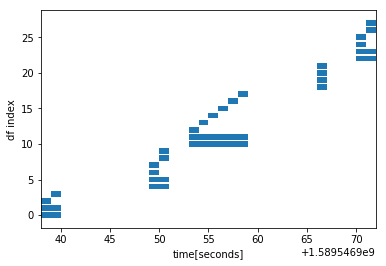

In [18]:
plt.barh(y=list(df['start'].index), 
         left=list(df['start'].values), 
         width=list(df['elapsed'].values))
plt.xlabel('time[seconds]');
plt.ylabel('df index');